In [1]:
import pandas as pd
df = pd.read_csv('processedCDC.csv', index_col='year_state')

In [2]:
CVDquestions = ('High blood pressure among adults',
       'Coronary heart disease mortality among all people, underlying cause',
       'Diseases of the heart mortality among all people, underlying cause',
       'High cholesterol among adults who have been screened',
       'Hospitalization for heart failure as principal diagnosis, Medicare-beneficiaries aged 65 years and older',
       'Taking medicine to control high blood pressure among adults with high blood pressure',
       'Cerebrovascular disease (stroke) mortality among all people, underlying cause',
       'Taking medicine for high cholesterol among adults')

cols = df.columns
CVDcols = cols[cols.str.startswith(CVDquestions)]
CVDdf = df[CVDcols]
CVDdf.to_csv('processedCVD.csv')

In [6]:
CVDdf

,"High blood pressure among adults, Age >=65, Crude Prevalence","High blood pressure among adults, Female, Crude Prevalence","High blood pressure among adults, Female, Age-adjusted Prevalence","High blood pressure among adults, Male, Crude Prevalence","High blood pressure among adults, Male, Age-adjusted Prevalence","High blood pressure among adults, Overall, Crude Prevalence","High blood pressure among adults, Overall, Age-adjusted Prevalence","High blood pressure among adults, Age 18-44, Crude Prevalence","High blood pressure among adults, Age 45-64, Crude Prevalence","High blood pressure among adults, American Indian or Alaska Native, non-Hispanic, Crude Prevalence",...,"Taking medicine for high cholesterol among adults, Black, non-Hispanic, Crude Prevalence","Taking medicine for high cholesterol among adults, Black, non-Hispanic, Age-adjusted Prevalence","Taking medicine for high cholesterol among adults, Hispanic, Crude Prevalence","Taking medicine for high cholesterol among adults, Hispanic, Age-adjusted Prevalence","Taking medicine for high cholesterol among adults, Hawaiian or Pacific Islander, non-Hispanic, Crude Prevalence","Taking medicine for high cholesterol among adults, Hawaiian or Pacific Islander, non-Hispanic, Age-adjusted Prevalence","Taking medicine for high cholesterol among adults, Asian, non-Hispanic, Crude Prevalence","Taking medicine for high cholesterol among adults, Asian, non-Hispanic, Age-adjusted Prevalence","Taking medicine for high cholesterol among adults, Multiracial, non-Hispanic, Crude Prevalence","Taking medicine for high cholesterol among adults, Multiracial, non-Hispanic, Age-adjusted Prevalence"
year_state,,,,,,,,,,,,,,,,,,,,,
2015_GA,0.415695,0.416053,0.386056,0.468750,0.414660,0.415191,0.384426,0.359670,0.373724,0.433493,...,0.499174,0.527160,0.442801,0.417360,0.245217,0.351515,0.31312,0.325804,0.461957,0.376523
2016_GA,0.415695,0.416053,0.386056,0.468750,0.414660,0.415191,0.384426,0.359670,0.373724,0.433493,...,0.499174,0.527160,0.442801,0.417360,0.245217,0.351515,0.31312,0.325804,0.461957,0.376523
2018_GA,0.415695,0.416053,0.386056,0.468750,0.414660,0.415191,0.384426,0.359670,0.373724,0.433493,...,0.499174,0.527160,0.442801,0.417360,0.245217,0.351515,0.31312,0.325804,0.461957,0.376523
2019_GA,0.600000,0.544248,0.616000,0.473958,0.597458,0.497238,0.599138,0.383333,0.556420,0.433493,...,0.416667,0.468571,0.285156,0.357143,0.245217,0.351515,0.31312,0.205714,0.026163,0.202279
2020_GA,0.415695,0.416053,0.386056,0.468750,0.414660,0.415191,0.384426,0.359670,0.373724,0.433493,...,0.499174,0.527160,0.442801,0.417360,0.245217,0.351515,0.31312,0.325804,0.461957,0.376523
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018_PR,0.415695,0.416053,0.386056,0.468750,0.414660,0.415191,0.384426,0.359670,0.373724,0.433493,...,0.499174,0.527160,0.442801,0.417360,0.245217,0.351515,0.31312,0.325804,0.461957,0.376523
2019_PR,0.686364,0.778761,0.836000,0.734375,0.686441,0.779006,0.767241,0.541667,0.821012,0.433493,...,0.499174,0.527160,0.828125,0.555556,0.245217,0.351515,0.31312,0.325804,0.461957,0.376523
2020_PR,0.415695,0.416053,0.386056,0.468750,0.414660,0.415191,0.384426,0.359670,0.373724,0.433493,...,0.499174,0.527160,0.442801,0.417360,0.245217,0.351515,0.31312,0.325804,0.461957,0.376523


In [3]:
CVDstatesdf = CVDdf
CVDdf.index.str.contains('US')
CVDstatesdf = CVDdf.loc[~CVDdf.index.str.contains('US')]

TO-DO: Make these clustering plots for different value types

Text(0, 0.5, 'PCA 2')

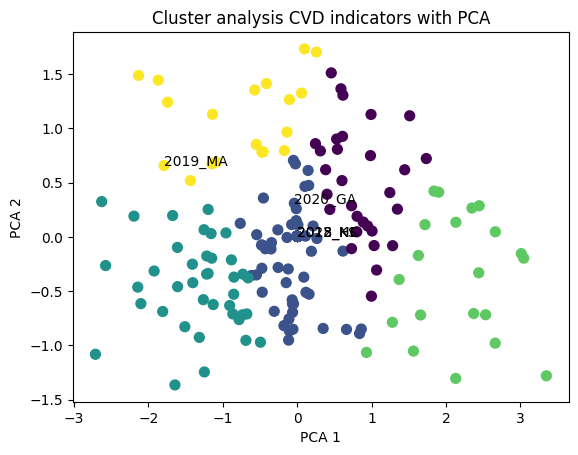

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
#clustering
pca = PCA(n_components=2)
data = pca.fit_transform(CVDstatesdf)
kmeans = KMeans(n_clusters = 5, n_init='auto').fit(data)
ymeans = kmeans.predict(data)
plt.scatter(data[:, 0], data[:, 1], c=ymeans, s=50, cmap='viridis')
for i, index in enumerate(CVDdf.index):
    #print(data[i,0].dtype,data[i,1].dtype,type(year),type(float(data[i,0])))
    if i%80==4:
        plt.annotate(str(index),(data[i,0],data[i,1]))
plt.title('Cluster analysis CVD indicators with PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')